# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from ratelimit import limits

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# Preparing the base URL and required params

base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    "APPID" : weather_api_key,
    "units" : "metric",
    "q" : ""
}

# Defining the data structure to extract the data from API calls

cities_data = {
    'City_ID' : [],
    'City' : [],
    'Cloudiness' : [],
    'Country': [],
    'Date' : [],
    'Humidity': [],
    'Lat' : [],
    'Lng' : [],
    'Max Temp' : [],
    'Wind Speed' : []
}

In [22]:
# Performing API calls to retrieve the data and populate "cities_data"

# Annotation to limit "call_api" function to 60 API calls per minute
@limits(calls=60, period=60)
def call_api():

    print("Beginning Data Retrieval")     
    print("-----------------------------")

    i = 0
    for city in cities:
        try:
            # Preparing the params for the call, updating the city name to be searched
            params["q"] = city
            # Calling API and getting the json response
            response = requests.get(base_url, params=params)
            response = response.json()

            # Updating the "cities_data" structure with the required information
            cities_data['City_ID'].append(response["id"])
            cities_data['City'].append(response["name"])
            cities_data['Cloudiness'].append(response["clouds"]["all"])
            cities_data['Country'].append(response["sys"]["country"])
            cities_data['Date'].append(response["dt"])
            cities_data['Humidity'].append(response["main"]['humidity'])
            cities_data['Lat'].append(response["coord"]["lat"])
            cities_data['Lng'].append(response["coord"]["lon"])
            cities_data['Max Temp'].append(response["main"]['temp_max'])
            cities_data['Wind Speed'].append(response["wind"]['speed'])

            print(f"Processing Record {i+1} of {len(cities)} - {city}")

        except: # In case of any exception, printing the relevant message
            print(f"City not found. Skipping... ({city}) - Record {i+1} of {len(cities)}")
        i=i+1

    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

call_api()

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 610 - tuatapere
Processing Record 2 of 610 - namibe
Processing Record 3 of 610 - barrow
Processing Record 4 of 610 - bethel
Processing Record 5 of 610 - pacific grove
Processing Record 6 of 610 - bubaque
Processing Record 7 of 610 - dwarka
Processing Record 8 of 610 - jamestown
City not found. Skipping... (belushya guba) - Record 9 of 610
City not found. Skipping... (taolanaro) - Record 10 of 610
Processing Record 11 of 610 - cidreira
Processing Record 12 of 610 - rikitea
Processing Record 13 of 610 - upernavik
Processing Record 14 of 610 - georgetown
City not found. Skipping... (nizhneyansk) - Record 15 of 610
Processing Record 16 of 610 - nanortalik
Processing Record 17 of 610 - albany
Processing Record 18 of 610 - tuktoyaktuk
City not found. Skipping... (scottsburgh) - Record 19 of 610
Processing Record 20 of 610 - vaini
Processing Record 21 of 610 - yingcheng
Processing Record 22 of 610 - yeppoon
Processi

Processing Record 195 of 610 - san julian
Processing Record 196 of 610 - saint-francois
Processing Record 197 of 610 - bathsheba
Processing Record 198 of 610 - kavaratti
Processing Record 199 of 610 - pasir gudang
Processing Record 200 of 610 - praya
Processing Record 201 of 610 - port hawkesbury
Processing Record 202 of 610 - batagay
Processing Record 203 of 610 - lompoc
Processing Record 204 of 610 - fortuna
Processing Record 205 of 610 - kostomuksha
City not found. Skipping... (mys shmidta) - Record 206 of 610
City not found. Skipping... (burica) - Record 207 of 610
City not found. Skipping... (sentyabrskiy) - Record 208 of 610
Processing Record 209 of 610 - tasiilaq
City not found. Skipping... (yanan) - Record 210 of 610
Processing Record 211 of 610 - sorong
Processing Record 212 of 610 - severo-kurilsk
City not found. Skipping... (duzici) - Record 213 of 610
Processing Record 214 of 610 - berlevag
City not found. Skipping... (tabiauea) - Record 215 of 610
Processing Record 216 of 

City not found. Skipping... (felidhoo) - Record 394 of 610
City not found. Skipping... (bolungarvik) - Record 395 of 610
Processing Record 396 of 610 - taoudenni
City not found. Skipping... (toamua) - Record 397 of 610
Processing Record 398 of 610 - clyde river
Processing Record 399 of 610 - torbay
Processing Record 400 of 610 - aksu
City not found. Skipping... (kamenskoye) - Record 401 of 610
Processing Record 402 of 610 - bermejo
Processing Record 403 of 610 - gao
City not found. Skipping... (tanshui) - Record 404 of 610
Processing Record 405 of 610 - bonavista
Processing Record 406 of 610 - saint-leu
Processing Record 407 of 610 - salinas
Processing Record 408 of 610 - nichinan
Processing Record 409 of 610 - camana
Processing Record 410 of 610 - tete
Processing Record 411 of 610 - alofi
Processing Record 412 of 610 - byron bay
Processing Record 413 of 610 - kodinsk
Processing Record 414 of 610 - estelle
Processing Record 415 of 610 - zambezi
City not found. Skipping... (tiruvottiyur

Processing Record 593 of 610 - purpe
Processing Record 594 of 610 - fereydunshahr
Processing Record 595 of 610 - jacareacanga
Processing Record 596 of 610 - sechura
Processing Record 597 of 610 - terrace
Processing Record 598 of 610 - mandalgovi
Processing Record 599 of 610 - qui nhon
Processing Record 600 of 610 - maniitsoq
Processing Record 601 of 610 - miraflores
Processing Record 602 of 610 - santa cruz
Processing Record 603 of 610 - ankazoabo
Processing Record 604 of 610 - bakchar
Processing Record 605 of 610 - fort nelson
Processing Record 606 of 610 - huaiyin
City not found. Skipping... (buqayq) - Record 607 of 610
Processing Record 608 of 610 - olinda
Processing Record 609 of 610 - bolobo
City not found. Skipping... (palabuhanratu) - Record 610 of 610
-----------------------------
Data Retrieval Complete      
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# Converting the data into Pandas DataFrame
cities_pd = pd.DataFrame(cities_data)

# Exporting the DataFrame into a CSV file
cities_pd.to_csv(output_data_file)

# Display the DataFrame
cities_pd

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,2180815,Tuatapere,100,NZ,1665318059,74,-46.1333,167.6833,12.32,4.34
1,3347019,Mossamedes,0,AO,1665318059,69,-15.1961,12.1522,26.35,5.14
2,5880054,Barrow,0,US,1665318059,93,71.2906,-156.7887,-6.99,3.60
3,5282297,Bethel,0,US,1665318060,86,41.3712,-73.4140,7.49,0.45
4,5380437,Pacific Grove,100,US,1665318060,94,36.6177,-121.9166,13.90,2.24
...,...,...,...,...,...,...,...,...,...,...
556,1511057,Bakchar,99,RU,1665318132,71,57.0186,82.0711,9.10,1.65
557,5955902,Fort Nelson,40,CA,1665318133,65,58.8053,-122.7002,6.77,2.57
558,1797873,Huai'an,100,CN,1665317849,38,33.5886,119.0192,12.81,5.91
559,3393536,Olinda,75,BR,1665318133,69,-8.0089,-34.8553,27.85,4.63


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
high_humidity_cities = cities_pd.loc[cities_pd['Humidity'] > 100]

if (len(high_humidity_cities["City"]) == 0):
    print ("There are no cities in the data set that has humidity > 100%.")
else:
    high_humidity_cities

There are no cities in the data set that has humidity > 100%.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

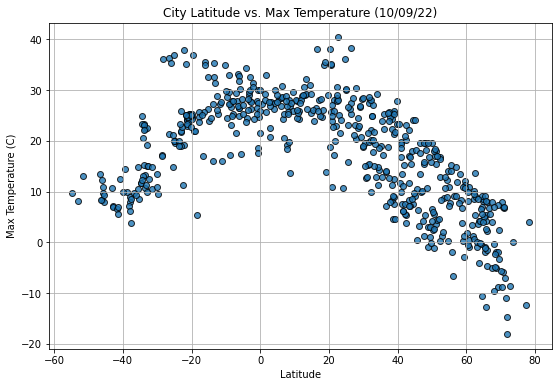

In [83]:
plt.figure(figsize=(9,6))

# Generating the Scatter Plot
plt.scatter(cities_pd['Lat'],cities_pd['Max Temp'], marker='o', alpha=0.8, edgecolors="black")

# Setting up the information for this plot: Title, Labels and Grid
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Exporting the graph to a PNG file
plt.savefig("./images/Fig01.png")

### Analysis
* Temperature is higher when near to the Equator (Latitude 0).
* Significative low temperature (negative) in the cities with Latitude between 60 and 80.

## Latitude vs. Humidity Plot

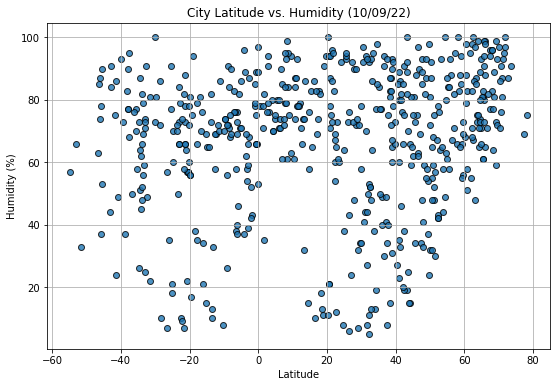

In [84]:
plt.figure(figsize=(9,6))

# Generating the Scatter Plot
plt.scatter(cities_pd['Lat'],cities_pd['Humidity'], marker='o', alpha=0.8, edgecolors="black")

# Setting up the information for this plot: Title, Labels and Grid
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Exporting the graph to a PNG file
plt.savefig("./images/Fig02.png")

In [79]:
x = cities_pd.loc[cities_pd['Humidity']>50]
len(x)/len(cities_pd)

0.7914438502673797

### Analysis
* The dataset is very spread, and it does not appear to have a relationship bewteen Humidity and Latitude.
* It seems to have a larger group of cities with Humidity above 50% (about 79% of the cities).

## Latitude vs. Cloudiness Plot

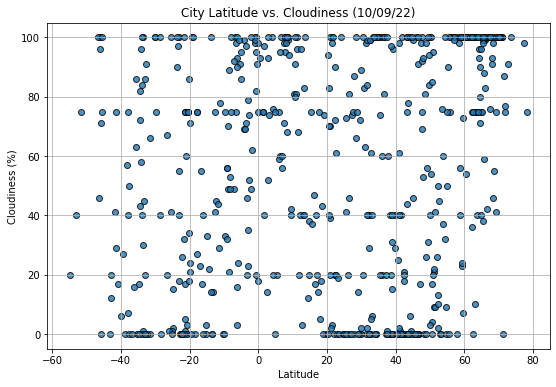

In [85]:
plt.figure(figsize=(9,6))

# Generating the Scatter Plot
plt.scatter(cities_pd['Lat'],cities_pd['Cloudiness'], marker='o', alpha=0.8, edgecolors="black")

# Setting up the information for this plot: Title, Labels and Grid
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Exporting the graph to a PNG file
plt.savefig("./images/Fig03.png")

In [82]:
x = cities_pd.loc[cities_pd['Cloudiness']>99]
y = cities_pd.loc[cities_pd['Cloudiness']<1]
(len(x)+len(y))/len(cities_pd)

0.34759358288770054

### Analysis
* The dataset is very spread, and it does not appear to have a relationship bewteen Latitude and Cloudiness.
* It seems that 1/3 of the cities on this data set are very cloudy (>99%) or nearly to no cloud (<1%), represented by 34.7% of the cities on this dataset.

## Latitude vs. Wind Speed Plot

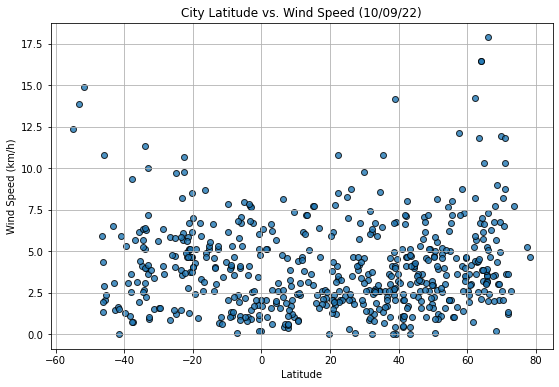

In [86]:
plt.figure(figsize=(9,6))

# Generating the Scatter Plot
plt.scatter(cities_pd['Lat'],cities_pd['Wind Speed'], marker='o', alpha=0.8, edgecolors="black")

# Setting up the information for this plot: Title, Labels and Grid
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.grid(True)

# Exporting the graph to a PNG file
plt.savefig("./images/Fig04.png")

### Analysis
* The dataset is very spread, and it does not appear to have a relationship bewteen Latitude and Wind Speed.
* Most of the data also present Wind Speed as lower than 7.5 km/h.


## Linear Regression

In [ ]:
# Identifying the cities in the Northern Hemisphere (Latitude >= 0)
northern_hemisphere_df = cities_pd.loc[cities_pd["Lat"] >= 0]

# Identifying the cities in the Southern Hemisphere (Latitude < 0)
southern_hemisphere_df = cities_pd.loc[cities_pd["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

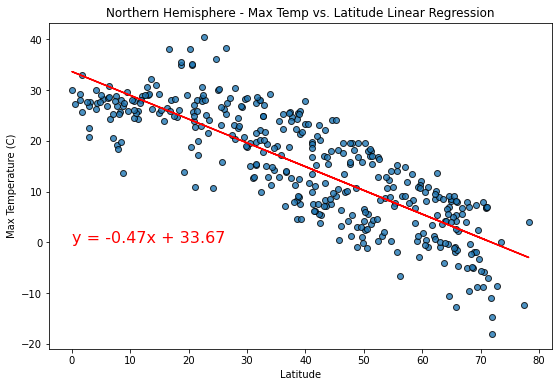

In [87]:
# Getting the information required for the plot (x_axis and y_axis)
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Max Temp"]

# Calculating the linear regression and the linear equation to be presented in the plot
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Initialising the plot with the scatter, and finally the regression line
plt.subplots(figsize=(9, 6))
plt.scatter(x_axis, y_axis, marker='o', alpha=0.8, edgecolors="black")
plt.plot(x_axis, regress_values, color="red")

# Setting up the information for this plot: Title, Labels and Grid
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Adding the linear equation to the plot
plt.annotate(line_eq, (0,0), color="red", fontsize=16)

# Exporting the graph to a PNG file
plt.savefig("./images/Fig05.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

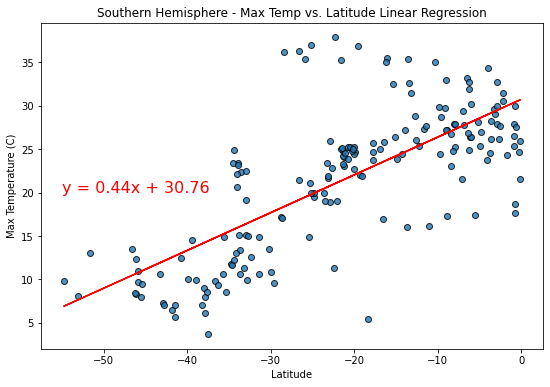

In [88]:
# Getting the information required for the plot (x_axis and y_axis)
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df["Max Temp"]

# Calculating the linear regression and the linear equation to be presented in the plot
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Initialising the plot with the scatter, and finally the regression line
plt.subplots(figsize=(9, 6))
plt.scatter(x_axis, y_axis, marker='o', alpha=0.8, edgecolors="black")
plt.plot(x_axis, regress_values, color="red")

# Setting up the information for this plot: Title, Labels and Grid
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Adding the linear equation to the plot
plt.annotate(line_eq, (-55, 20), color="red", fontsize=16)

# Exporting the graph to a PNG file
plt.savefig("./images/Fig06.png")

### Analysis -  Max Temp vs. Latitude Linear Regression
* Previous 2 plot indicate the Max Temperature vs. Latitude for Northern hemisphere, and Southern hemisphere.
* In the plot considering cities in the Northern hemisphere, we can see a *negative* linear relationship, i.e., lower max temperatures for higher latitude.
* In the plot considering cities in the Southern hemisphere, we can see a *positive* linear relationship, i.e., higher max temperatures for higher latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

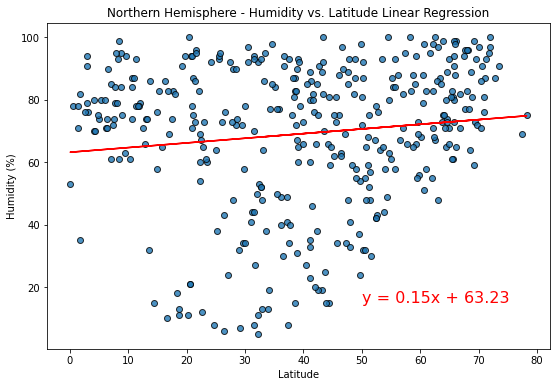

In [89]:
# Getting the information required for the plot (x_axis and y_axis)
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Humidity"]

# Calculating the linear regression and the linear equation to be presented in the plot
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Initialising the plot with the scatter, and finally the regression line
plt.subplots(figsize=(9, 6))
plt.scatter(x_axis, y_axis, marker='o', alpha=0.8, edgecolors="black")
plt.plot(x_axis, regress_values, color="red")

# Setting up the information for this plot: Title, Labels and Grid
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Adding the linear equation to the plot
plt.annotate(line_eq, (50,15), color="red", fontsize=16)

# Exporting the graph to a PNG file
plt.savefig("./images/Fig07.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

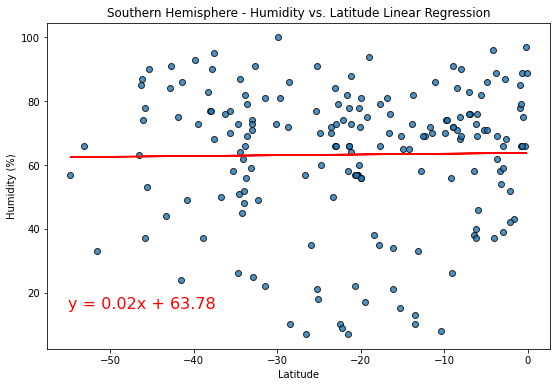

In [90]:
# Getting the information required for the plot (x_axis and y_axis)
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df["Humidity"]

# Calculating the linear regression and the linear equation to be presented in the plot
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Initialising the plot with the scatter, and finally the regression line
plt.subplots(figsize=(9, 6))
plt.scatter(x_axis, y_axis, marker='o', alpha=0.8, edgecolors="black")
plt.plot(x_axis, regress_values, color="red")

# Setting up the information for this plot: Title, Labels and Grid
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Adding the linear equation to the plot
plt.annotate(line_eq, (-55, 15), color="red", fontsize=16)

# Exporting the graph to a PNG file
plt.savefig("./images/Fig08.png")

### Analysis -  Humidity vs. Latitude Linear Regression
* Previous 2 plot indicate the Humidity vs. Latitude for Northern hemisphere, and Southern hemisphere.
* The dataset is very spread for both Northern hemisphere and Southern hemisphere, and it does not appear to have a relationship bewteen Latitude and Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

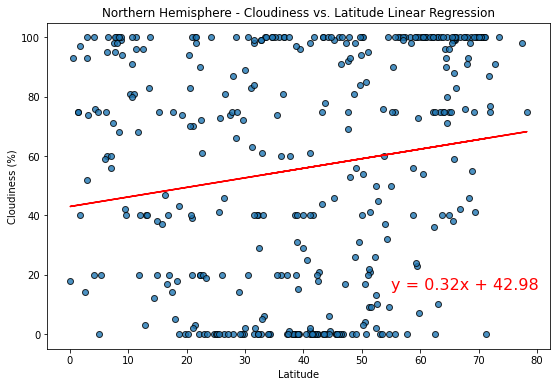

In [91]:
# Getting the information required for the plot (x_axis and y_axis)
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Cloudiness"]

# Calculating the linear regression and the linear equation to be presented in the plot
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Initialising the plot with the scatter, and finally the regression line
plt.subplots(figsize=(9, 6))
plt.scatter(x_axis, y_axis, marker='o', alpha=0.8, edgecolors="black")
plt.plot(x_axis, regress_values, color="red")

# Setting up the information for this plot: Title, Labels and Grid
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Adding the linear equation to the plot
plt.annotate(line_eq, (55,15), color="red", fontsize=16)

# Exporting the graph to a PNG file
plt.savefig("./images/Fig09.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

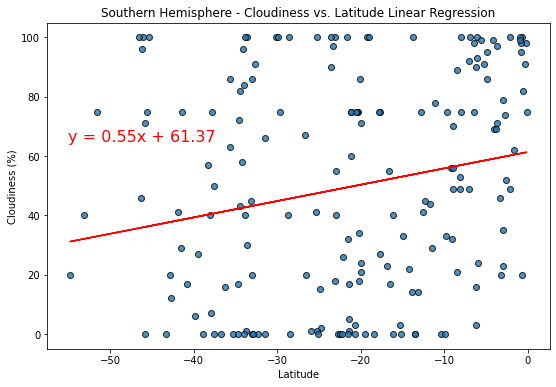

In [92]:
# Getting the information required for the plot (x_axis and y_axis)
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df["Cloudiness"]

# Calculating the linear regression and the linear equation to be presented in the plot
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Initialising the plot with the scatter, and finally the regression line
plt.subplots(figsize=(9, 6))
plt.scatter(x_axis, y_axis, marker='o', alpha=0.8, edgecolors="black")
plt.plot(x_axis, regress_values, color="red")

# Setting up the information for this plot: Title, Labels and Grid
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Adding the linear equation to the plot
plt.annotate(line_eq, (-55, 65), color="red", fontsize=16)

# Exporting the graph to a PNG file
plt.savefig("./images/Fig10.png")

### Analysis - Cloudiness vs. Latitude Linear Regression
* Previous 2 plot indicate the Cloudiness vs. Latitude for Northern hemisphere, and Southern hemisphere.
* The dataset is very spread for both Northern hemisphere and Southern hemisphere, and it does not appear to have a relationship bewteen Latitude and Cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

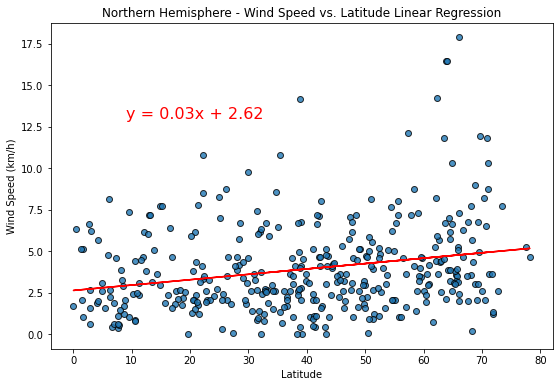

In [93]:
# Getting the information required for the plot (x_axis and y_axis)
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Wind Speed"]

# Calculating the linear regression and the linear equation to be presented in the plot
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Initialising the plot with the scatter, and finally the regression line
plt.subplots(figsize=(9, 6))
plt.scatter(x_axis, y_axis, marker='o', alpha=0.8, edgecolors="black")
plt.plot(x_axis, regress_values, color="red")

# Setting up the information for this plot: Title, Labels and Grid
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")

# Adding the linear equation to the plot
plt.annotate(line_eq, (9,13), color="red", fontsize=16)

# Exporting the graph to a PNG file
plt.savefig("./images/Fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

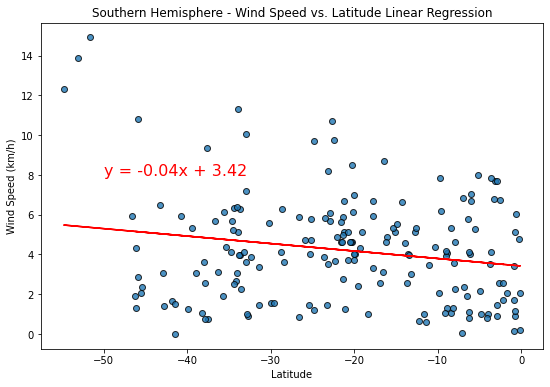

In [94]:
# Getting the information required for the plot (x_axis and y_axis)
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df["Wind Speed"]

# Calculating the linear regression and the linear equation to be presented in the plot
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Initialising the plot with the scatter, and finally the regression line
plt.subplots(figsize=(9, 6))
plt.scatter(x_axis, y_axis, marker='o', alpha=0.8, edgecolors="black")
plt.plot(x_axis, regress_values, color="red")

# Setting up the information for this plot: Title, Labels and Grid
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")

# Adding the linear equation to the plot
plt.annotate(line_eq, (-50,8), color="red", fontsize=16)

# Exporting the graph to a PNG file
plt.savefig("./images/Fig12.png")

### Analysis - Wind Speed vs. Latitude Linear Regression
* Previous 2 plot indicate the Wind Speed vs. Latitude for Northern hemisphere, and Southern hemisphere.
* The dataset is very spread for both Northern hemisphere and Southern hemisphere, and it does not appear to have a relationship bewteen Latitude and Wind Speed.